In [2]:
# Quadrotor Control Demo

#This notebook demonstrates the usage of our quadrotor environment with PID control for both hovering and trajectory tracking tasks.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pybullet as p
from quadrotor_gym.environments.quadrotor_env import QuadrotorEnv
from quadrotor_gym.controllers.pid_controller import PIDController
from quadrotor_gym.utils.visualization import TrajectoryVisualizer

pybullet build time: Feb 15 2025 15:51:53


In [2]:
## 1. Hovering Task

#First, let's test the quadrotor's ability to hover at a fixed position.

/Users/darkflames/quadrotor_gym/env/lib/python3.13/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/darkflames/quadrotor_gym/env/lib/python3.13/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


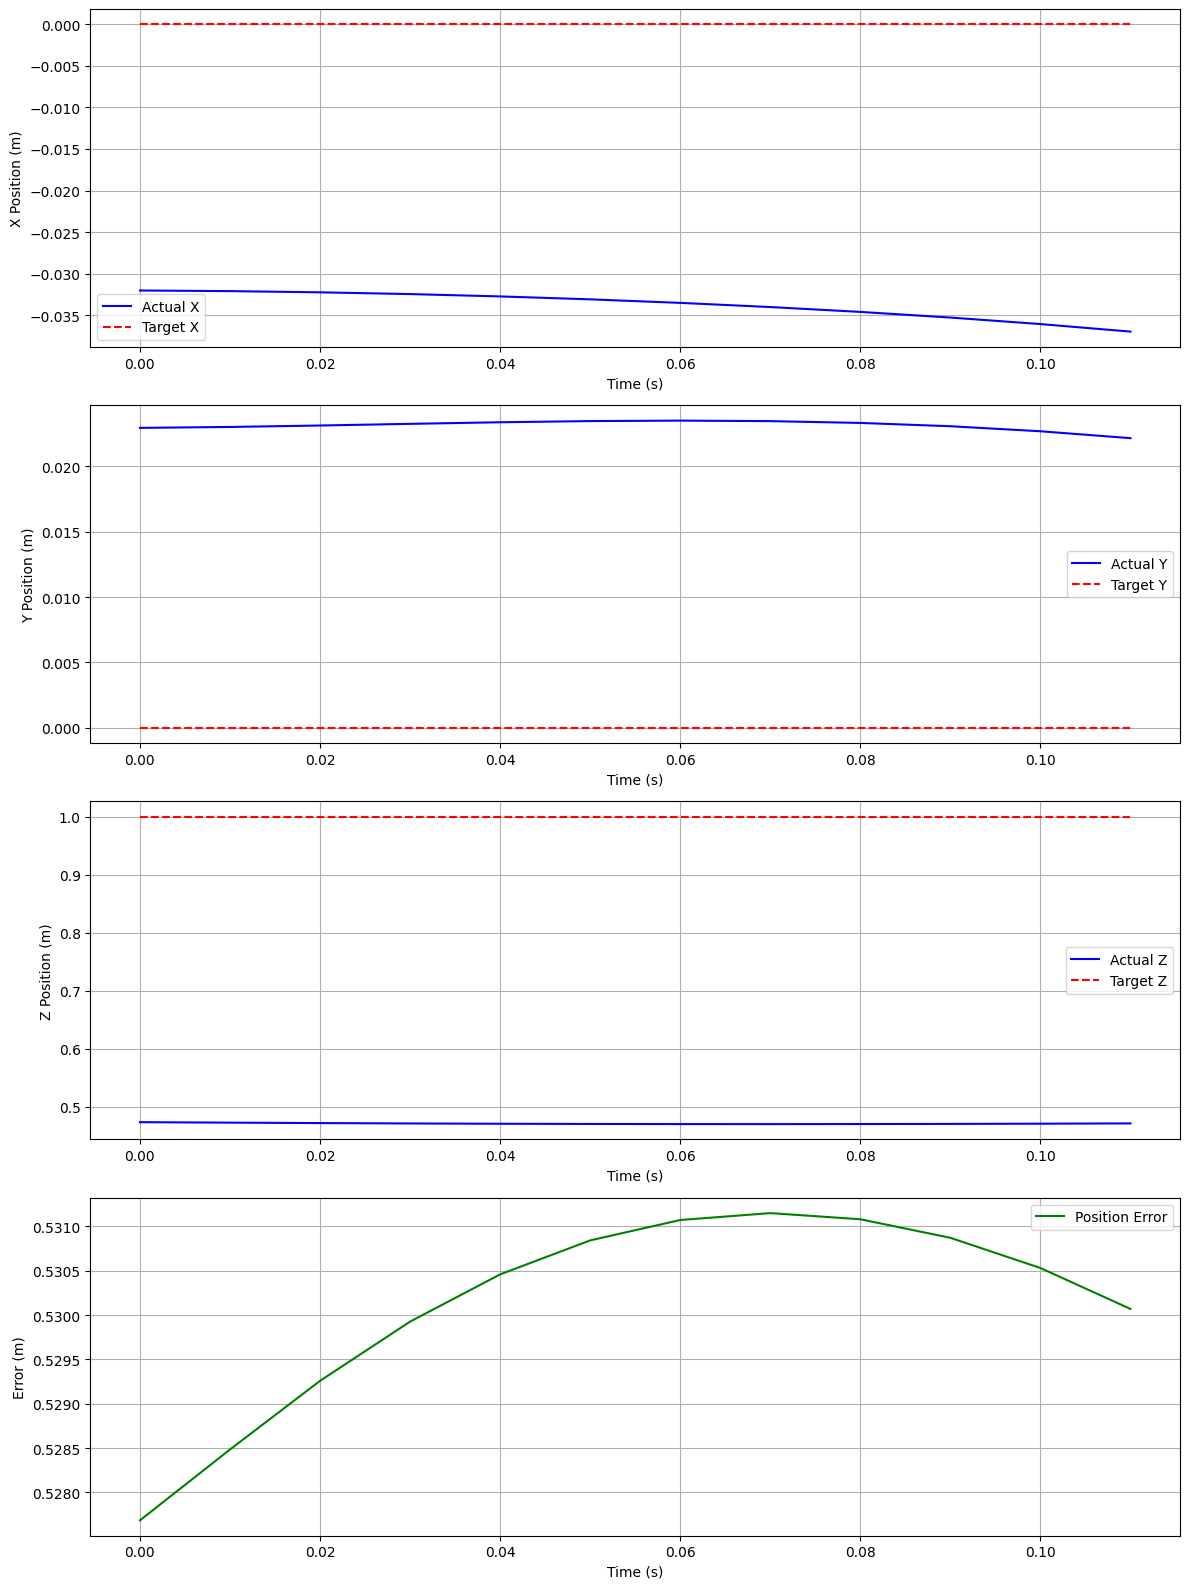

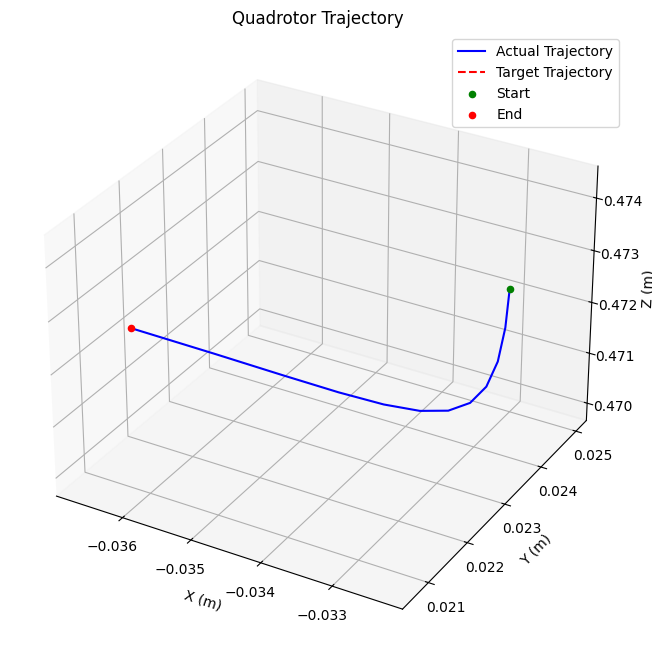

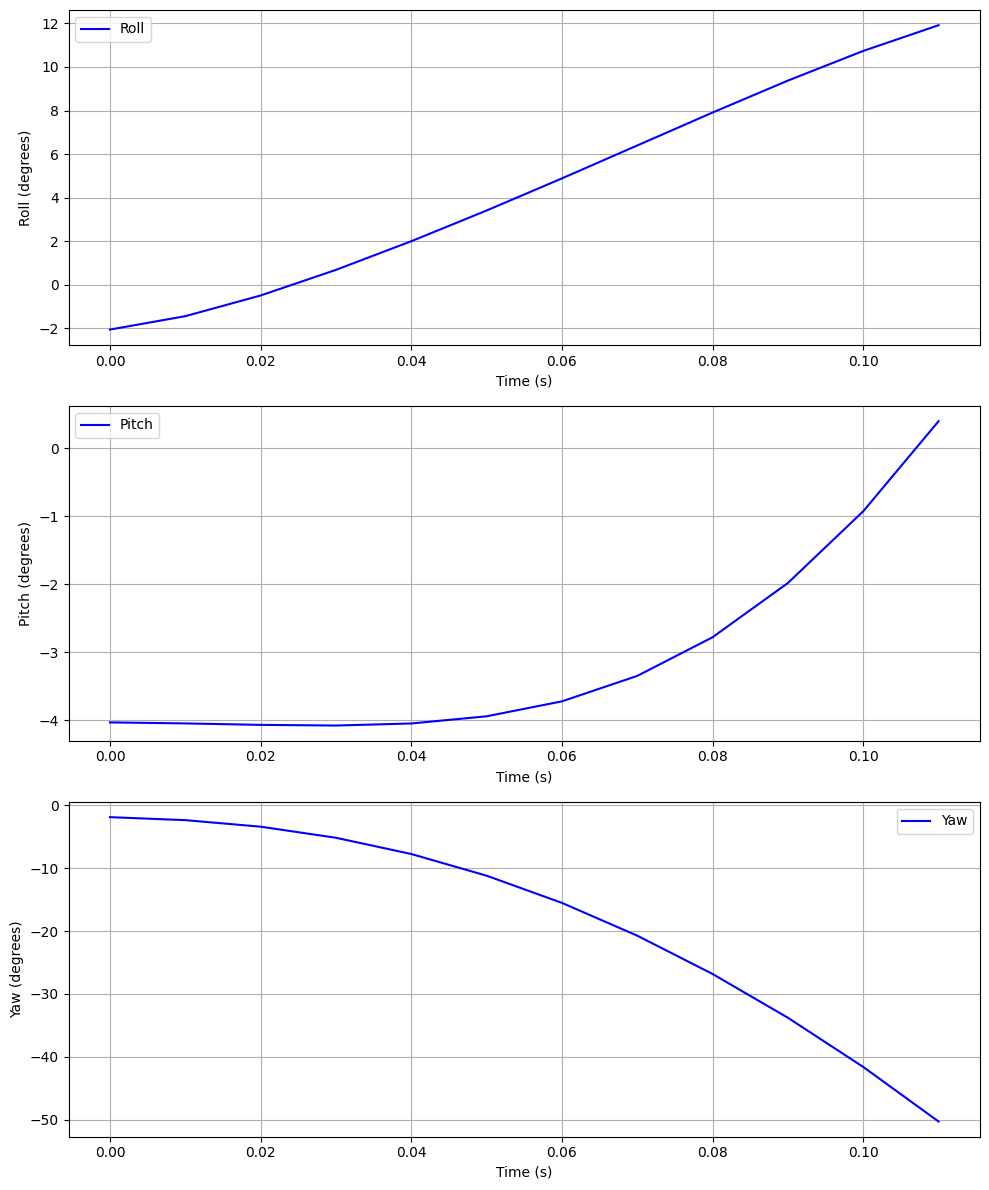

In [3]:
## 1. Hovering Task
# Create environment and controller
env = QuadrotorEnv(task='hover')
controller = PIDController()
visualizer = TrajectoryVisualizer()

# Set target hover position
target_position = np.array([0., 0., 1.])  # Hover at 1m height

# Reset environment and controller
observation, info = env.reset()
controller.reset()
visualizer.reset()

# Simulation loop
for t in range(1000):  # 10 seconds at 100Hz
    # Get control action from PID controller
    # Note: observation now includes quaternion instead of euler angles
    target_yaw = 0.0  # Specify desired yaw angle
    action = controller.compute_control(observation, target_position, target_yaw)
    
    # Step environment
    next_observation, reward, terminated, truncated, info = env.step(action)
    
    # Update visualization
    position = next_observation[:3]
    # Convert quaternion to euler angles for visualization
    quat = next_observation[3:7]
    euler = np.array(p.getEulerFromQuaternion(quat))  # Add this import: import pybullet as p
    visualizer.update(position, target_position, t/100, euler)
    
    observation = next_observation
    
    if terminated or truncated:
        break

# Plot results
visualizer.plot_2d()
visualizer.plot_3d()
visualizer.plot_attitude()

In [6]:
## 2. Trajectory Tracking Task

#Now, let's test the quadrotor's ability to track a circular trajectory.

/Users/darkflames/quadrotor_gym/env/lib/python3.13/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/darkflames/quadrotor_gym/env/lib/python3.13/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


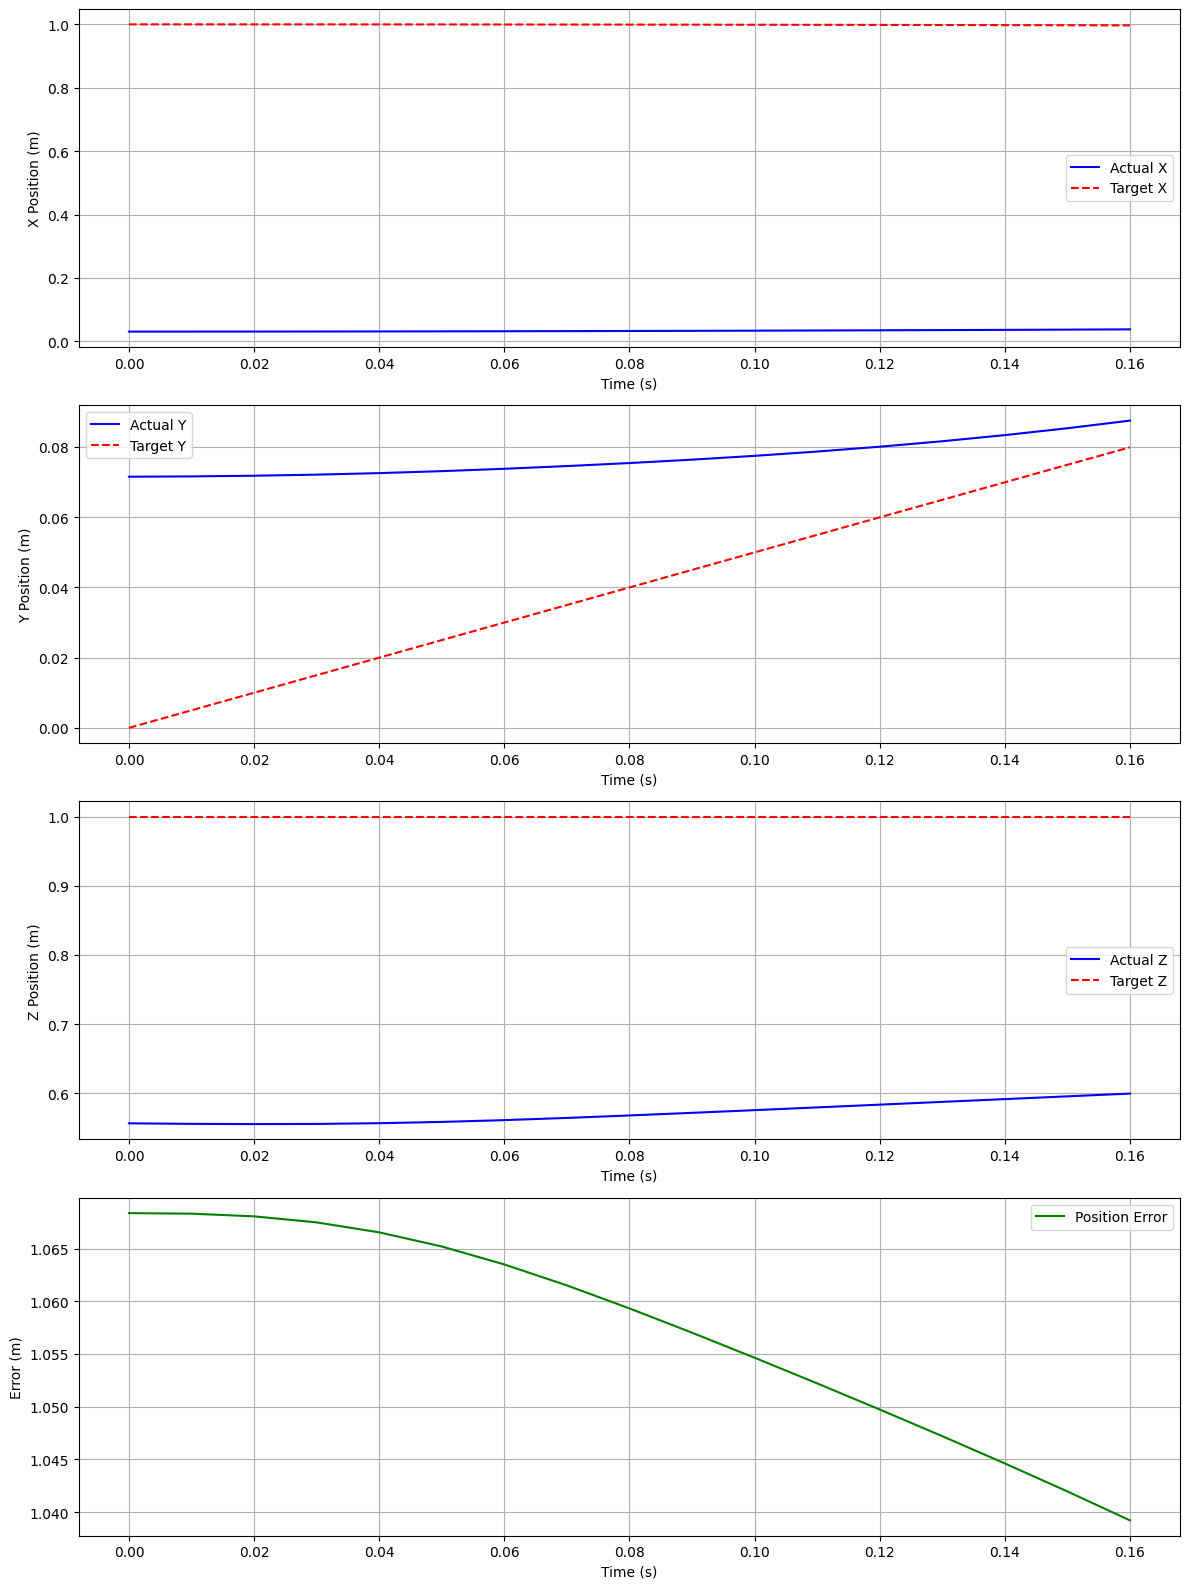

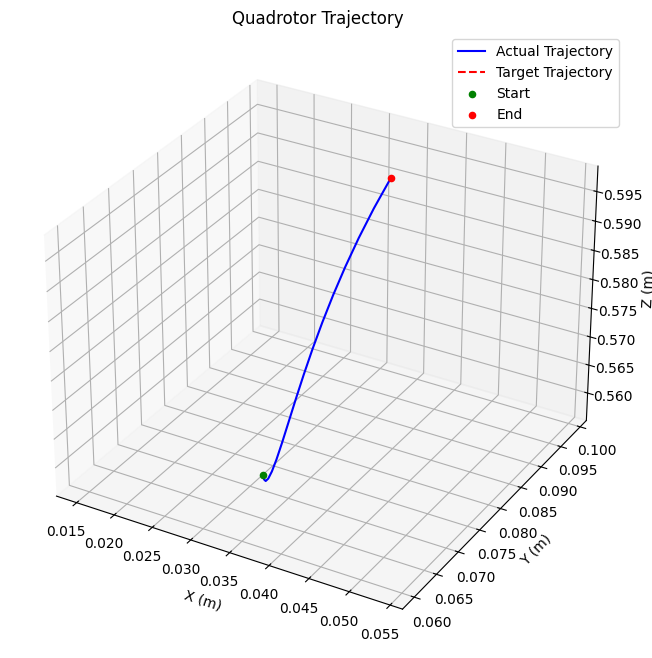

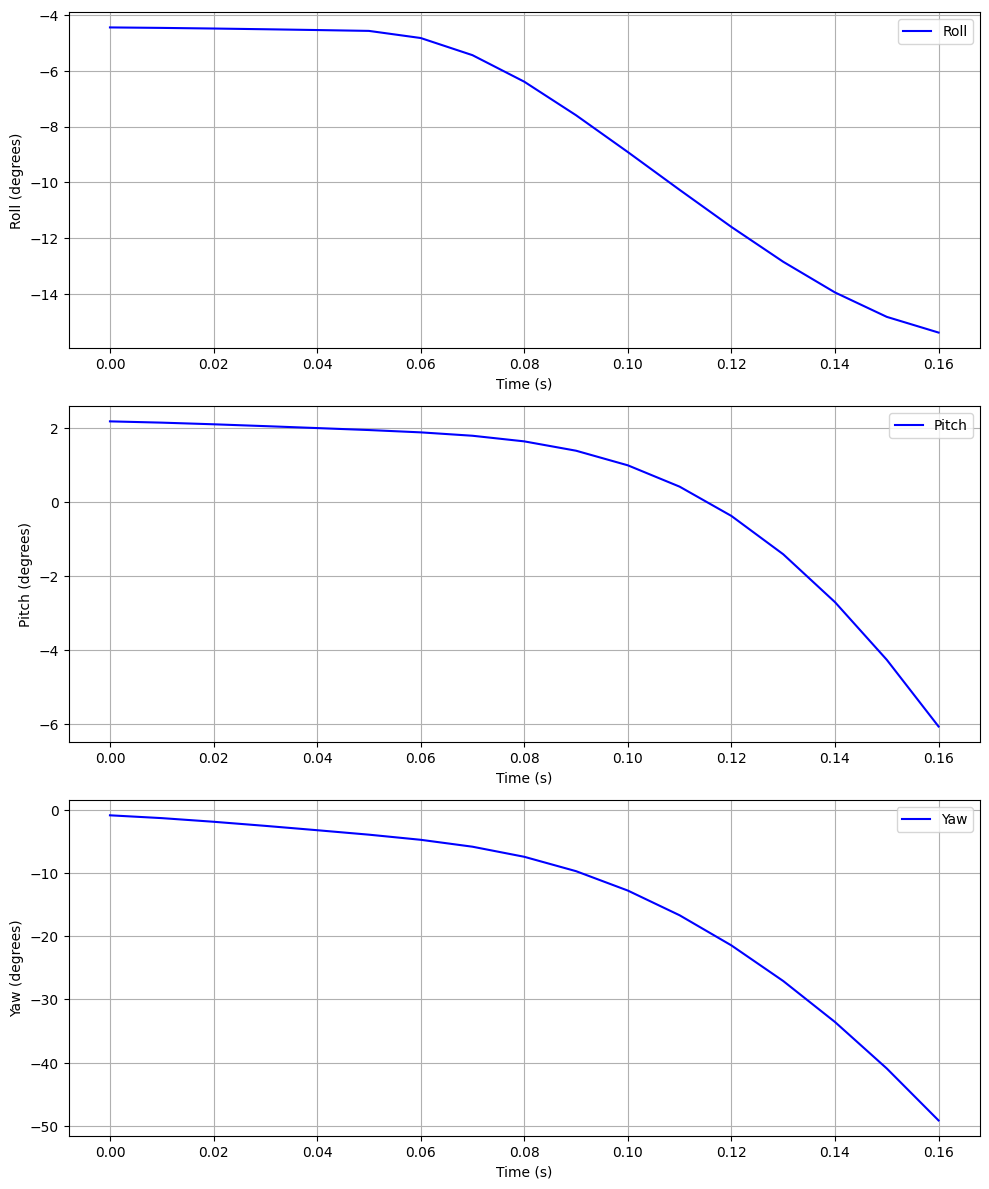

In [3]:
## 2. Trajectory Tracking Task
def circular_trajectory(t):
    """Generate circular trajectory."""
    radius = 1.0
    omega = 0.5  # Reduced frequency for better tracking
    x = radius * np.cos(omega * t)
    y = radius * np.sin(omega * t)
    z = 1.0
    return np.array([x, y, z])

# Create environment and controller
env = QuadrotorEnv(task='tracking')
controller = PIDController()
visualizer = TrajectoryVisualizer()

# Set trajectory
env.set_trajectory(circular_trajectory)

# Reset environment and controller
observation, info = env.reset()
controller.reset()
visualizer.reset()

# Simulation loop
for t in range(2000):  # 20 seconds at 100Hz
    # Get current target position from trajectory
    target_position = circular_trajectory(t/100)
    
    # Compute desired yaw to face direction of motion
    target_yaw = np.arctan2(target_position[1], target_position[0])
    
    # Get control action from PID controller
    action = controller.compute_control(observation, target_position, target_yaw)
    
    # Step environment
    next_observation, reward, terminated, truncated, info = env.step(action)
    
    # Update visualization
    position = next_observation[:3]
    quat = next_observation[3:7]
    euler = np.array(p.getEulerFromQuaternion(quat))
    visualizer.update(position, target_position, t/100, euler)
    
    observation = next_observation
    
    if terminated or truncated:
        break

# Plot results
visualizer.plot_2d()
visualizer.plot_3d()
visualizer.plot_attitude()